In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
color = sns.color_palette()
%matplotlib inline

In [11]:
x = 0
T = 1000
y = []
for t in range(T):
    x = rho_x * x + np.random.normal(x, 0.1)
    y.append(np.random.normal(x, 1))
y = np.array(y)

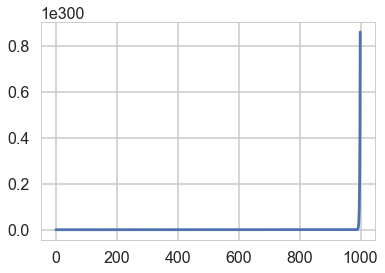

In [12]:
plt.plot(y)

In [14]:
def kalman_filter(y, sigma_eps, sigma_gamma, mu_init, sigma_init):
    T = len(y)
    mu = [mu_init]
    sigma = [sigma_init]
    for t in range(T):
        mu.append(mu[-1] + (sigma_eps + sigma[-1]) / (sigma_eps + sigma[-1] + sigma_gamma)*(y[t] -  mu[-1]))
        sigma.append(1/(1 / (sigma[-1] + sigma_eps) + 1 / sigma_gamma))
    return mu, sigma

In [15]:
def kalman_smoother(y, x_filter, sigma_filter, sigma_eps, sigma_gamma):
    T = len(y)
    mu = [x_filter[-1]]
    sigma = [sigma_filter[-1]]
    for t in range(1, T + 1):
        mu.append(x_filter[T - t] + sigma_filter[T - t]/(sigma_filter[T - t] + sigma_eps) * (mu[-1] - x_filter[T - t]))
        sigma.append((sigma_filter[T - t]/(sigma_filter[T - t] + sigma_eps))**2 * sigma[-1] + sigma_filter[T-t]/(sigma_filter[T - t] + sigma_eps) * sigma_eps)
    return mu, sigma

In [16]:
def E_step(y, sigma_eps, sigma_gamma, mu_init, sigma_init):
    x_filter, sigma_filter = kalman_filter(y, sigma_eps, sigma_gamma, mu_init, sigma_init)
    x_smoother, sigma_smoother = kalman_smoother(y, x_filter, sigma_filter, sigma_eps, sigma_gamma)
    
    return x_smoother[::-1], x_smoother[0], sigma_smoother, sigma_filter

In [17]:
def M_step(y, x_smoother, sigma_smoother, sigma_filter, sigma_eps_old):
    T = len(y)
#     sigma_eps = sum((x_smoother[1:] - x_smoother[:T]) ** 2)/T
#     sigma_gamma = sum((y - x_smoother[1:])**2)/(T + 1)

    W = x_smoother ** 2 + sigma_smoother
    W_cov = x_smoother[1:] * x_smoother[:T] \
            + sigma_filter[:T]/(sigma_filter[:T] + sigma_eps_old) * sigma_smoother[1:]
    
    sigma_eps = sum(W[1:] + W[:T] - 2 * W_cov)/T
    sigma_gamma = sum(y ** 2 + x_smoother[1:]**2 + sigma_smoother[1:] - 2 * y * x_smoother[1:])/(T + 1)

    return sigma_eps, sigma_gamma

In [18]:
def EM(y):
    sigma_eps_old = 0.08
    sigma_gamma_old = 0.8
    sigma_eps = 0.2
    sigma_gamma = 1
    mu_init = y[0]
    sigma_init = 0.1
    sigma_eps_ls = []
    sigma_gamma_ls = []
    while np.abs(sigma_eps_old - sigma_eps) > 1e-6 or np.abs(sigma_gamma_old - sigma_gamma) > 1e-6:
        sigma_eps_old = sigma_eps
        sigma_gamma_old = sigma_gamma
        x_smoother,mu_init,sigma_smoother, sigma_filter = E_step(y, sigma_eps, sigma_gamma, mu_init, sigma_init)
        sigma_eps, sigma_gamma = M_step(y, np.array(x_smoother), np.array(sigma_smoother), np.array(sigma_filter), sigma_eps_old)
        sigma_eps_ls.append(sigma_eps)
        sigma_gamma_ls.append(sigma_gamma)
    
    return x_smoother, sigma_eps_ls, sigma_gamma_ls

In [ ]:
x_smoother, sigma_eps_ls, sigma_gamma_ls = EM(y)

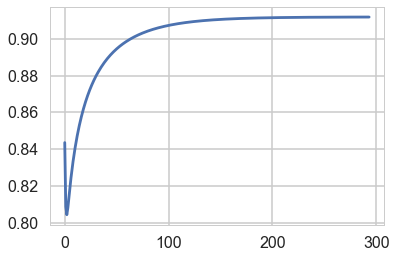

In [10]:
plt.plot(sigma_gamma_ls)

In [11]:
sigma_eps_ls

[0.17656214360950362,
 0.15877075334132204,
 0.14419686764335482,
 0.13180444812196307,
 0.12108575848126621,
 0.11172748119768117,
 0.10350170733698032,
 0.09623001227159206,
 0.08976856641164158,
 0.0839998248565472,
 0.07882687239496149,
 0.07416922556534983,
 0.06995961023679416,
 0.0661414507213349,
 0.06266689502951434,
 0.059495250017820044,
 0.05659173277461671,
 0.05392646782510964,
 0.051473676741750046,
 0.04921101934714542,
 0.04711905511009072,
 0.0451808004180603,
 0.04338136277455635,
 0.041707637060306654,
 0.04014805213603097,
 0.038692358487716016,
 0.03733144949730147,
 0.036057210391704196,
 0.03486239007771968,
 0.03374049198207262,
 0.03268568073952839,
 0.031692702149181275,
 0.030756814281628676,
 0.02987372799218769,
 0.02903955539650461,
 0.028250765109519512,
 0.027504143248225765,
 0.02679675936197892,
 0.026125936588333357,
 0.02548922544310274,
 0.024884380744998148,
 0.024309341251336714,
 0.02376221164477577,
 0.023241246564087856,
 0.022744836416501643,

In [12]:
sigma_gamma_ls

[0.8435285984723311,
 0.808708395386794,
 0.804323301769015,
 0.808089469076674,
 0.8136222872468954,
 0.8191675051127499,
 0.8243124537870863,
 0.8290082772113705,
 0.8332921097966887,
 0.8372138190881602,
 0.8408190536430359,
 0.8441466358489446,
 0.8472291632787267,
 0.8500940861346705,
 0.8527646755533419,
 0.8552608036886528,
 0.8575995592653305,
 0.8597957339819277,
 0.8618622095347175,
 0.8638102680271683,
 0.8656498428836051,
 0.867389723178934,
 0.8690377211999879,
 0.8706008107643205,
 0.8720852421149943,
 0.873496637925055,
 0.8748400739704644,
 0.8761201472842275,
 0.8773410340295086,
 0.8785065388829415,
 0.8796201373705627,
 0.8806850123241585,
 0.8817040854087871,
 0.8826800444992693,
 0.8836153675452338,
 0.8845123434529907,
 0.8853730904226159,
 0.8861995721055821,
 0.886993611888678,
 0.8877569055611075,
 0.8884910325814976,
 0.889197466128263,
 0.8898775820893078,
 0.890532667124008,
 0.8911639259112938,
 0.891772487681539,
 0.8923594121164153,
 0.8929256946894444,
 

In [38]:
x_filter, sigma_filter = kalman_filter(y, 0.05, 0.5, y[0], 0.05)

In [39]:
x_smoother,_ = kalman_smoother(y, x_filter, sigma_filter, 0.05, 0.5)

In [20]:
df = pd.read_csv('cryptocurrencypricehistory-daily/bitcoin_price.csv')

In [21]:
df = df[::-1]

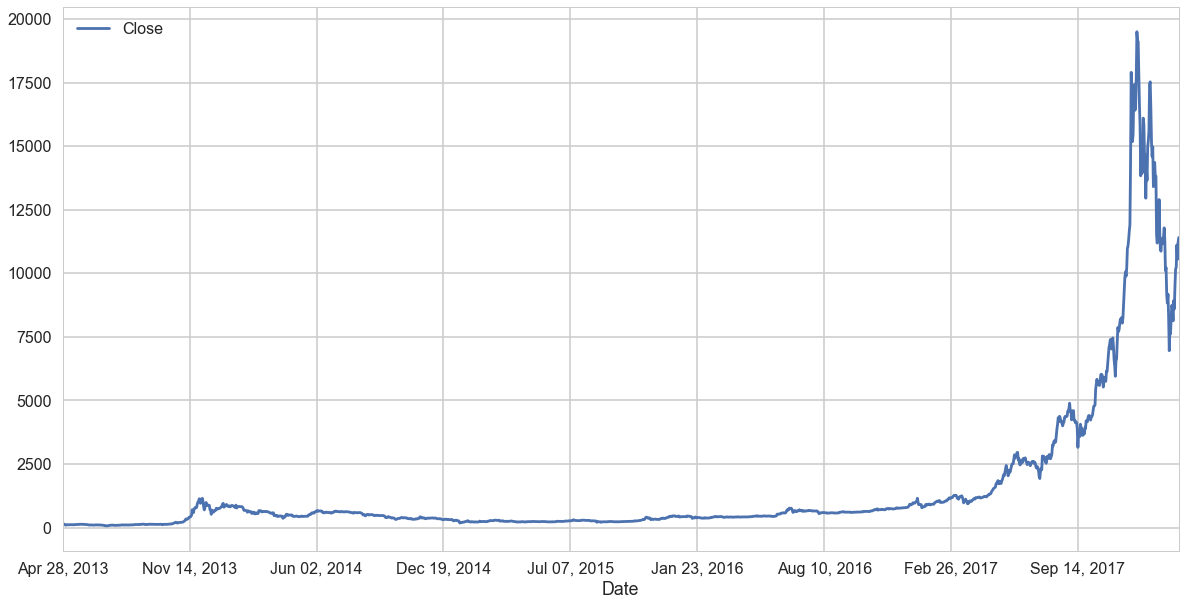

In [22]:
df.plot('Date', 'Close', figsize=(20,10))

In [23]:
price = df.Close.values

In [24]:
#price_ret = (price[1:] - price[:len(price) - 1]) / price[:len(price) - 1]
# price_ret = np.log(price)
price_ret = price

In [25]:
x_smoother, sigma_eps_ls, sigma_gamma_ls= EM(price_ret[:1500])

In [22]:
sigma_eps_ls

[0.1568622583893741,
 0.09738382679718904,
 0.05323185583687782,
 0.028024646081279858,
 0.01475305475381522,
 0.007948519199284193,
 0.004503509759407123,
 0.0027741143266168914,
 0.001914879858958533,
 0.0014973665999054048,
 0.001305082881511306,
 0.0012274853814807046,
 0.0012070849173854109,
 0.0012136681608783655,
 0.001231563492381317,
 0.0012529932250297784,
 0.001274395690539104,
 0.0012943544341819783,
 0.0013124660727809215,
 0.0013287572975173134,
 0.0013434069346022236,
 0.0013566254084158705,
 0.0013686090839052174,
 0.0013795271875097891,
 0.0013895213764171027,
 0.001398709338078433,
 0.0014071890539598304,
 0.0014150426065741043,
 0.0014223392830032822,
 0.0014291380232640022,
 0.0014354893358386534,
 0.001441436800187238,
 0.0014470182536113943,
 0.0014522667371672402,
 0.0014572112564560863,
 0.0014618773987402705,
 0.001466287837765762,
 0.0014704627496706923,
 0.0014744201582555642,
 0.0014781762231725253,
 0.0014817454822534206,
 0.0014851410560999673,
 0.00148837

E[exp(X)]=exp(μ+σ2/2)

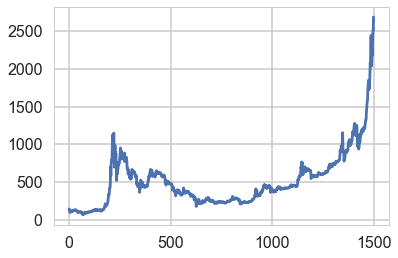

In [26]:
plt.plot(x_smoother[1:])

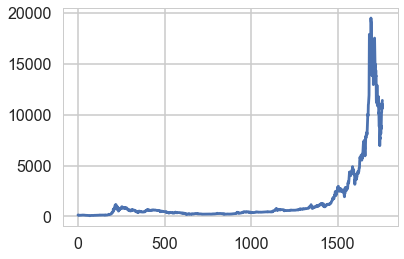

In [27]:
plt.plot(price_ret)

In [28]:
x_filter, sigma_filter = kalman_filter(price_ret[:1759], sigma_eps_ls[-1],  sigma_gamma_ls[-1], price_ret[0], sigma_gamma_ls[-1])

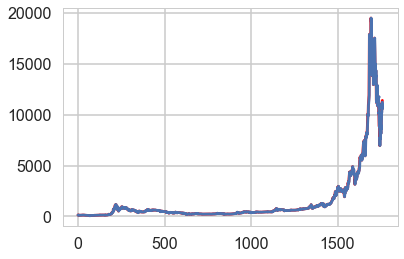

In [29]:
plt.errorbar(range(len(x_filter)), x_filter, yerr= 2 * np.sqrt(sigma_filter))
#plt.plot(price_ret[1000:1010])
plt.plot(price_ret[:1760], 'r')

In [30]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(price_ret, x_filter))

229.5612414143629

In [33]:
trainScore = np.sqrt(mean_squared_error(price_ret[:1500], x_filter[:1500]))
print('Train Score: %.6f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(price_ret[1500:], x_filter[1500:]))
print('Test Score: %.6f RMSE' % (testScore))

Train Score: 28.065886 RMSE
Test Score: 593.450079 RMSE


In [34]:
trainScore = np.sqrt(mean_squared_error(price_ret[:1500], price_ret[1:1501]))
print('Train Score: %.6f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(price_ret[1500:1759], price_ret[1501:]))
print('Test Score: %.6f RMSE' % (testScore))

Train Score: 28.432996 RMSE
Test Score: 594.493056 RMSE


In [37]:
pred = []
for t in range(260):
    x_smoother, sigma_eps_ls, sigma_gamma_ls= EM(price_ret[1300 + t:t + 1500])
    pred.append(x_smoother[-1])

In [38]:
np.sqrt(mean_squared_error(pred, price_ret[1500:]))

593.4495321589606

In [39]:
# compare with lstm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/Users/gwungwun/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [40]:
# split into train and test sets
train_size = 1500
test_size = len(price_ret) - train_size
train, test = price_ret.reshape(-1, 1)[0:train_size], price_ret.reshape(-1, 1)[train_size:len(price_ret)]
print(len(train), len(test))

1500 260


In [41]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [42]:
# convert an array of values into a dataset matrix
def create_dataset(price, look_back=1):
    X = []
    for i in range(look_back):
        X.append(price[i : i + len(price) - look_back])
    X.append(price[look_back: len(price)])
    return X

In [43]:
# reshape into X=t and Y=t+1
look_back = 1
train = create_dataset(train, look_back)
test = create_dataset(test, look_back)

In [44]:
trainX = train[0]
trainY = train[1]
testX = test[0]
testY = test[1]

In [45]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [46]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(10, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=8, verbose=2)

Epoch 1/10
 - 1s - loss: 0.0197
Epoch 2/10
 - 0s - loss: 0.0101
Epoch 3/10
 - 0s - loss: 0.0052
Epoch 4/10
 - 0s - loss: 0.0015
Epoch 5/10
 - 1s - loss: 2.5680e-04
Epoch 6/10
 - 0s - loss: 1.3450e-04
Epoch 7/10
 - 1s - loss: 1.3062e-04
Epoch 8/10
 - 1s - loss: 1.2948e-04
Epoch 9/10
 - 1s - loss: 1.2666e-04
Epoch 10/10
 - 0s - loss: 1.2624e-04


In [47]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [48]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 1.32 RMSE
